2.Problem Satement : A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

1.1 Business Objective 

Goal:

To ensure timely and consistent reporting of medical tests by evaluating the performance of laboratories.
Identify if any specific lab has a significantly different TAT, which can impact patient care.
___________________________________________________________________________________________________________________________________________________________

1.2 Constraints 

Limited Sample Size:
The analysis is based on a sample, which may not fully capture the variability across all reports from the labs.

Operational Delays:Differences in TAT may arise due to operational factors such as workload, holidays, or technical errors.

Measurement Accuracy:Ensuring that the data collected accurately reflects the time between sample collection and report dispatch.

Actionable Insights:The hospital needs actionable insights to enhance the efficiency of slow-performing labs.
_________________________________________________________________________________________________________________________________________________________

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Load the dataset
data = pd.read_csv("lab_tat_updated.csv")

# Display the first few rows of the dataset
print(data.head())

# Check the shape of the data
print(data.shape)

   Laboratory_1  Laboratory_2  Laboratory_3  Laboratory_4
0        185.35        165.53        176.70        166.13
1        170.49        185.91        198.45        160.79
2        192.77        194.92        201.23        185.18
3        177.33        183.00        199.61        176.42
4        193.41        169.57        204.63        152.60
(120, 4)


In [4]:
# Data Preprocessing
print(data.dtypes)
print(data.isna().sum()) # Check for null values


Laboratory_1    float64
Laboratory_2    float64
Laboratory_3    float64
Laboratory_4    float64
dtype: object
Laboratory_1    0
Laboratory_2    0
Laboratory_3    0
Laboratory_4    0
dtype: int64


In [5]:
# Assuming the columns are 'Lab1', 'Lab2', 'Lab3', 'Lab4'
# Fill null values with mean imputation
data.fillna(data.mean(), inplace=True)
print(data.isna().sum()) # Check again for null values


Laboratory_1    0
Laboratory_2    0
Laboratory_3    0
Laboratory_4    0
dtype: int64


In [6]:
# Descriptive statistics
print(data.describe())

       Laboratory_1  Laboratory_2  Laboratory_3  Laboratory_4
count    120.000000    120.000000    120.000000     120.00000
mean     178.257333    178.902917    200.210167     163.68275
std       13.919668     14.957114     15.794801      15.08508
min      140.250000    140.550000    170.580000     124.06000
25%      170.267500    168.025000    190.182500     154.05000
50%      179.055000    178.870000    198.610000     164.42500
75%      187.222500    189.112500    211.197500     172.88250
max      216.390000    217.860000    238.700000     205.18000


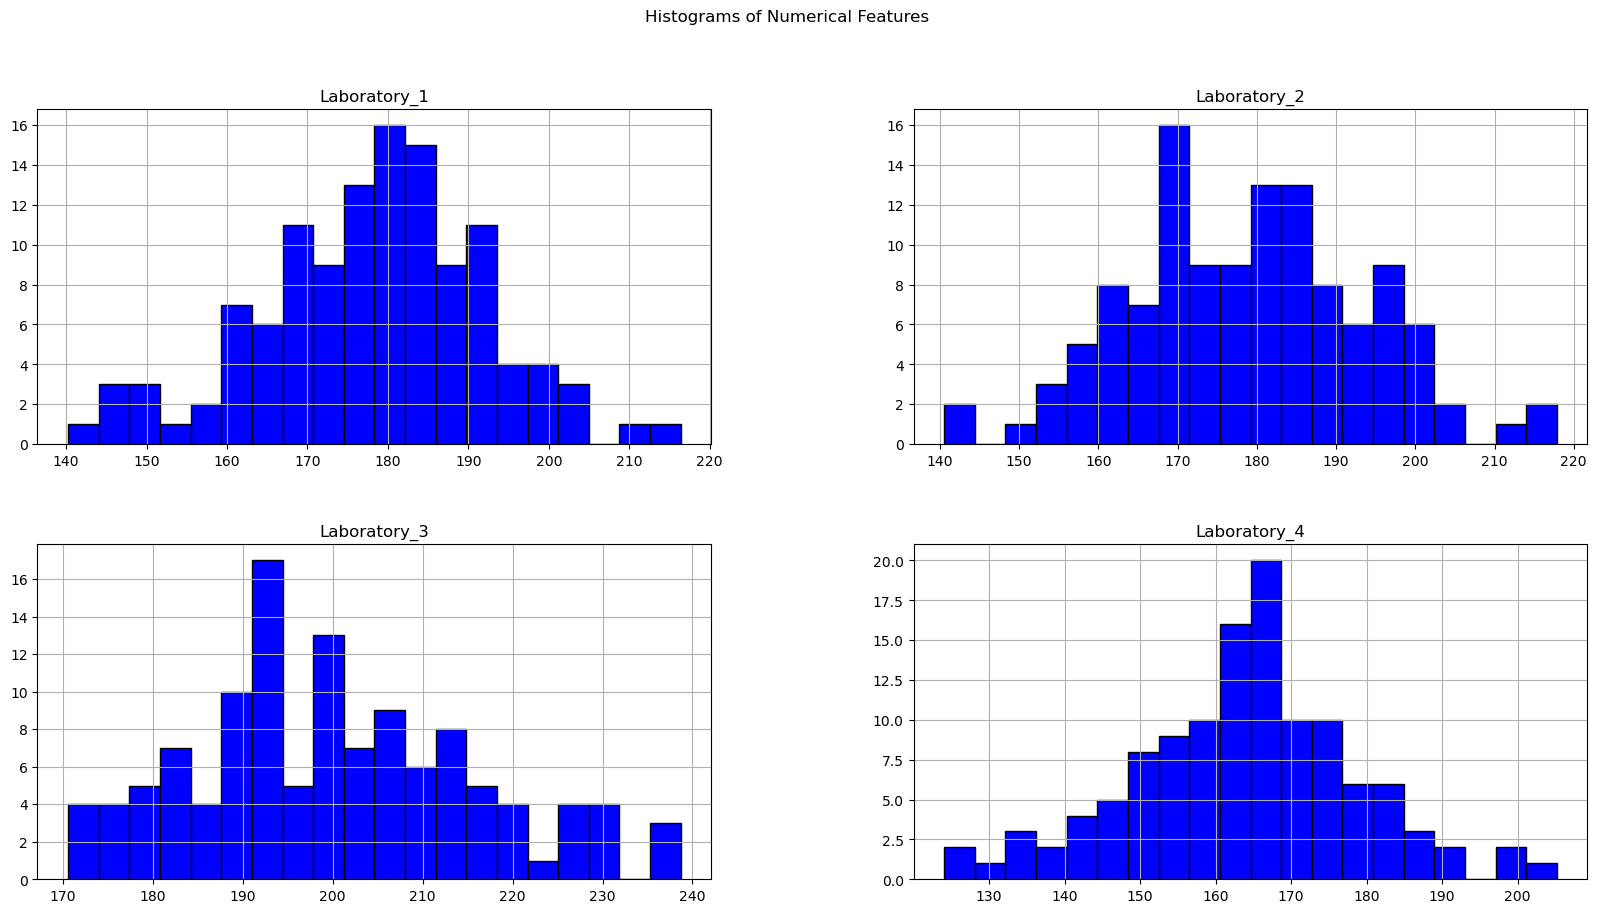

In [7]:
# Univariate Analysis
data.hist(figsize=(20, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

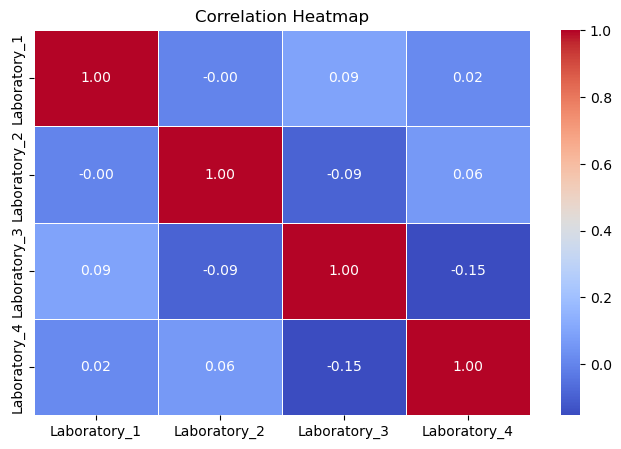

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Assumption 1: Normality Test
# Shapiro-Wilk test for each lab
shapiro_results = {}
for column in data.columns:
    shapiro_results[column] = stats.shapiro(data[column])
    print(f"Shapiro-Wilk Test Results for {column}: Statistic={shapiro_results[column].statistic}, p-value={shapiro_results[column].pvalue}")


Shapiro-Wilk Test Results for Laboratory_1: Statistic=0.9886689843295583, p-value=0.42316547647722136
Shapiro-Wilk Test Results for Laboratory_2: Statistic=0.9936320020018462, p-value=0.8637345311091214
Shapiro-Wilk Test Results for Laboratory_3: Statistic=0.9796067665538031, p-value=0.06547079619606683
Shapiro-Wilk Test Results for Laboratory_4: Statistic=0.9913755409425613, p-value=0.6619161995270413


In [11]:
# Assumption 2: Variance Test
# Levene's test for equality of variances across all labs
levene_test = stats.levene(data['Laboratory_1'], data['Laboratory_2'], data['Laboratory_3'], data['Laboratory_4'])
print("\nLevene’s Test Results:")
print(f"Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")



Levene’s Test Results:
Statistic=1.025294593220823, p-value=0.38107781677304564


In [41]:
# Hypothesis Testing: One-Way ANOVA
# Perform One-Way ANOVA
anova_test = stats.f_oneway(
    data['Laboratory_1'],
    data['Laboratory_2'],
    data['Laboratory_3'],
    data['Laboratory_4']
)

print("\nOne-Way ANOVA Results:")
print(f"F-statistic={anova_test.statistic}, p-value={anova_test.pvalue}")



One-Way ANOVA Results:
F-statistic=121.39264646442368, p-value=2.143740909435053e-58


In [43]:

# Final Inference
alpha = 0.05
if anova_test.pvalue <= alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in the average TAT among the laboratories.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in the average TAT among the laboratories.")



Conclusion: Reject the null hypothesis. There is a significant difference in the average TAT among the laboratories.
